In [1]:
from src.utils import *
from src.SIR import Learner
import matplotlib.pyplot as plt

In [2]:
data_d = load_json("./data/data_url.json")
download_data(data_d)

In [3]:
sum_cases_province('data/time_series_19-covid-Confirmed.csv', 'data/time_series_19-covid-Confirmed-country.csv')
sum_cases_province('data/time_series_19-covid-Recovered.csv', 'data/time_series_19-covid-Recovered-country.csv')
sum_cases_province('data/time_series_19-covid-Deaths.csv', 'data/time_series_19-covid-Deaths-country.csv')

In [4]:
a = Learner('Russia', '1/31/20', 5000000)

In [5]:
a.train(0.7)
pred = a.predict()

      fun: 1.0496379095004706
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.01, 0.01])


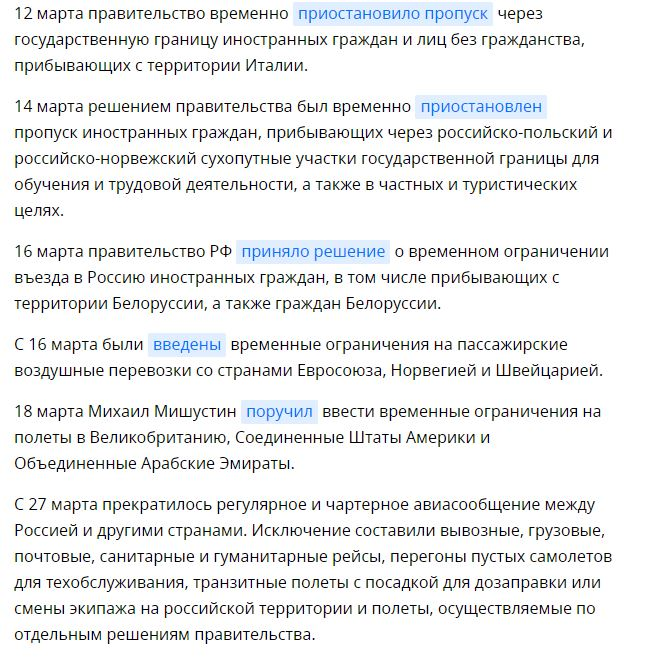

In [6]:
from IPython.display import Image

Image(filename= "images/123.JPG")


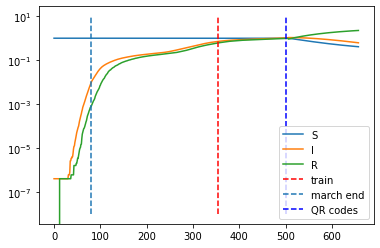

In [7]:
plt.semilogy(np.concatenate([a.potencial.values, pred[0]]), label='S')
plt.semilogy(np.concatenate([a.confirmed.values, pred[1]]), label='I')
plt.semilogy(np.concatenate([a.immunne.values, pred[2]]), label='R')
plt.vlines([a.train_index], 10e-9, 10, linestyles='dashed', label='train', colors='r')
plt.vlines([80], 10e-9, 10, linestyles='dashed', label='march end')
plt.vlines([500], 10e-9, 10, linestyles='dashed', label='QR codes', colors='b')
plt.legend()
plt.show()

In [21]:
pred_d = a.derivative_sir(pred, 0)
real_d = a.derivative_sir(
    [
        a.potencial[a.train_index:].values,
        a.confirmed[a.train_index:].values,
        a.immunne[a.train_index:].values,
     ], 0)

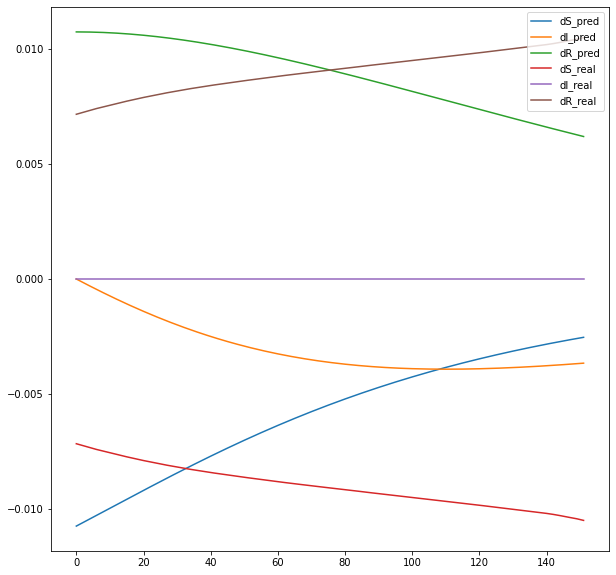

In [23]:
plt.figure(figsize=(10, 10))
plt.plot(pred_d[0], label='dS_pred')
plt.plot(pred_d[1], label='dI_pred')
plt.plot(pred_d[2], label='dR_pred')
plt.plot(real_d[0], label='dS_real')
plt.plot(real_d[1], label='dI_real')
plt.plot(real_d[2], label='dR_real')
plt.legend()
plt.show()
